In [1]:
import numpy as np
from scipy.stats import binom
from scipy.optimize import newton
from scipy.optimize import root
import matplotlib.pyplot as plt
from tail_probability import Hoeffding, BernoulliChernoff, BernoulliExactAsymptotics, CentralLimitTheorem, CentralLimitTheoremT

In [2]:
hoeffding = Hoeffding(0.05)
bernoulliChernoff = BernoulliChernoff(0.05)
bernoulliExactAsymptotics = BernoulliExactAsymptotics(0.05)
centralLimitTheorem = CentralLimitTheorem(0.05)
centralLimitTheoremT = CentralLimitTheoremT(0.05)

# Relative errors

In [3]:
ns = np.arange(1, 1000)

In [4]:
mu = 0.8
x = 0.7

In [5]:
p_hoeffding = hoeffding.p(ns, mu - x)

In [6]:
p_bernoulliChernoff = bernoulliChernoff.p(ns, x, mu)

In [7]:
p_bernoulliExactAsymptotics = bernoulliExactAsymptotics.p(ns, x, mu)

In [8]:
p_centralLimitTheorem = centralLimitTheorem.p(ns, x, mu, np.sqrt(mu*(1-mu)))

In [9]:
p_centralLimitTheoremT = centralLimitTheoremT.p(ns, x, mu, np.sqrt(mu*(1-mu)))

In [10]:
answer = binom.cdf(np.round(x * ns), ns, mu)

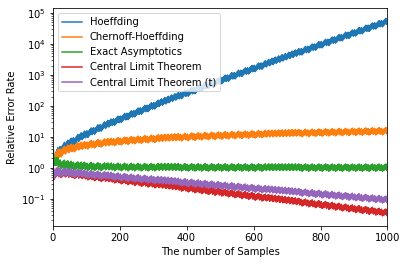

In [11]:
plt.plot(ns, p_hoeffding / answer, label='Hoeffding')
plt.plot(ns, p_bernoulliChernoff / answer, label='Chernoff-Hoeffding')
plt.plot(ns, p_bernoulliExactAsymptotics / answer, label='Exact Asymptotics')
plt.plot(ns, p_centralLimitTheorem / answer, label='Central Limit Theorem')
plt.plot(ns, p_centralLimitTheoremT / answer, label='Central Limit Theorem (t)')
plt.yscale('log')
plt.xlabel('The number of Samples')
plt.xlim(0, 1000)
plt.ylabel('Relative Error Rate')
plt.legend()
plt.savefig('relative_error_rate.pdf', bbox_inches="tight")

# Relationship between sample volume and confidence interval

In [12]:
interval = np.array([0.01, 0.02, 0.03, 0.05, 0.1, 0.3, 0.5]) / 4

In [13]:
mean = 0.8

In [14]:
stddev = np.sqrt(mean*(1-mean))

In [15]:
intervals = np.arange(0.01, 3.2, 0.01) / 4

In [16]:
ns = list(range(1, 10000)) + list(range(10000, 100000, 1000))

In [17]:
n_hoeffding = hoeffding.n_samples(intervals)

In [18]:
n_bernoulliChernoff = bernoulliChernoff.n_samples(intervals, mean)

In [19]:
n_bernoulliExactAsymptotics = [bernoulliExactAsymptotics.n_samples(i, mean) for i in intervals]

In [20]:
d_centralLimitTheorem = centralLimitTheorem.confidence_interval(ns, stddev)

In [21]:
d_centralLimitTheoremT = [centralLimitTheoremT.confidence_interval(i, stddev) for i in ns]

In [22]:
def interval_answer(n):
    k = binom.ppf(0.05/2, n, mean)
    return mean - k/float(n) 

In [23]:
d_answers = [interval_answer(i) for i in ns]

In [24]:
def error_rate_answer(n, interval):
    return binom.cdf((mean - interval)*n, n, mean)

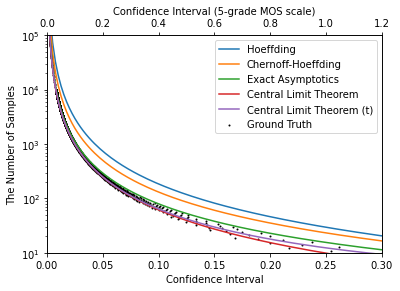

In [25]:
scaled_intervals = intervals * 4
plt.plot(intervals, n_hoeffding, label='Hoeffding')
plt.plot(intervals, n_bernoulliChernoff, label='Chernoff-Hoeffding')
plt.plot(intervals, n_bernoulliExactAsymptotics, label='Exact Asymptotics')
plt.plot(d_centralLimitTheorem, ns, label='Central Limit Theorem')
plt.plot(d_centralLimitTheoremT, ns, label='Central Limit Theorem (t)')
plt.scatter(d_answers, ns, label='Ground Truth', s=1, color='black')
plt.yscale('log')
plt.xlabel('Confidence Interval')
plt.ylabel('The Number of Samples')
plt.xlim(0, 0.3)
plt.ylim(10, 100000)
plt.legend()

t1 = plt.twiny()
t1.set_xlim(0, 1)
ticks = np.array(list(np.arange(0.0, 0.3, 0.05)) + [0.3])
t1.set_xticks(np.clip(ticks * 1.0 / 0.3, 0.0, 1.0))
t1.set_xticklabels([f"{i*4:.2}" for i in ticks])
t1.set_xlabel("Confidence Interval (5-grade MOS scale)")
plt.savefig('n_samples2.pdf', bbox_inches="tight")

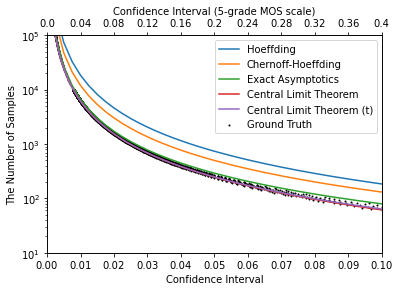

In [26]:
scaled_intervals = intervals * 4
plt.plot(intervals, n_hoeffding, label='Hoeffding')
plt.plot(intervals, n_bernoulliChernoff, label='Chernoff-Hoeffding')
plt.plot(intervals, n_bernoulliExactAsymptotics, label='Exact Asymptotics')
plt.plot(d_centralLimitTheorem, ns, label='Central Limit Theorem')
plt.plot(d_centralLimitTheoremT, ns, label='Central Limit Theorem (t)')
plt.scatter(d_answers, ns, label='Ground Truth', s=1, color='black')
plt.yscale('log')
plt.xlabel('Confidence Interval')
plt.ylabel('The Number of Samples')
ticks = np.array(list(np.arange(0.0, 0.1, 0.01)) + [0.1])
plt.xticks(ticks)
plt.xlim(0, 0.1)
plt.ylim(10, 100000)
plt.legend()

t1 = plt.twiny()
t1.set_xlim(0, 1)
t1.set_xticks(np.clip(ticks * 1.0 / 0.1, 0.0, 1.0))
t1.set_xticklabels([f"{i*4:.2}" for i in ticks])
t1.set_xlabel("Confidence Interval (5-grade MOS scale)")
plt.savefig('n_samples.pdf', bbox_inches="tight")